In [1]:
!pip install transformers torch evaluate rouge-score nltk


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24986 sha256=ebc2a44f6b708637a4e27c5cda2b638034e566f029f920cc3024fd14773bb8f6
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [14]:
!pip install evaluate rouge-score nltk


In [24]:
models = {
    "GPT2": "gpt2",
    "DistilGPT2": "distilgpt2",
    "T5-small": "t5-small",
    "BART-small": "facebook/bart-base"
}



In [28]:
prompts = [
    "Explain TOPSIS in simple words.",
    "What is machine learning?",
    "Write a short story about AI."
]

references = {
    "Explain TOPSIS in simple words.": "TOPSIS is a multi-criteria decision making method that selects the best option by comparing distances from ideal and worst solutions.",
    "What is machine learning?": "Machine learning is a field of artificial intelligence where systems learn patterns from data without explicit programming.",
    "Write a short story about AI.": "Once upon a time, an intelligent machine helped humans solve problems and improve life, learning more every day and becoming a trusted companion."
}


In [15]:
import evaluate

bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")


In [36]:
results = []

for name, model_id in models.items():
    print("Loading:", name)
    gen = pipeline("text-generation", model=model_id)

    bleu_scores = []
    rouge_scores = []
    total_time = 0
    total_len = 0

    for p in prompts:
        start = time.time()
        out = gen(p, max_length=150)
        end = time.time()

        gen_text = out[0]["generated_text"]
        ref_text = references[p]

        total_time += (end - start)
        total_len += len(gen_text.split())

        bleu_score = bleu.compute(predictions=[gen_text], references=[ref_text])["bleu"]
        rouge_score = rouge.compute(predictions=[gen_text], references=[ref_text])["rougeL"]

        bleu_scores.append(bleu_score)
        rouge_scores.append(rouge_score)

    # 👇 AVERAGE PER MODEL
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    avg_rouge = sum(rouge_scores) / len(rouge_scores)
    avg_time = total_time / len(prompts)
    avg_len = total_len / len(prompts)

    # 👇 ONE ROW PER MODEL
    results.append([name, avg_bleu, avg_rouge, avg_time, avg_len])


Loading: GPT2


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers

Loading: DistilGPT2


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers

Loading: T5-small


Device set to use cpu
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['PeftModelForCausalLM', 'ApertusForCausalLM', 'ArceeForCausalLM', 'AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BitNetForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'BltForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV2ForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'DogeForCausalLM', 'Dots1ForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'Ernie4_5ForCausalLM', 'Ernie4_5_MoeForCausalLM', 'Exaone4ForCausalLM', 'FalconForCausalLM', 'FalconH1ForCausalLM', 'FalconMambaForCausalLM', 'FlexOlmoF

Loading: BART-small


Some weights of BartForCausalLM were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['lm_head.weight', 'model.decoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=150) seem to 

In [37]:
df = pd.DataFrame(
    results,
    columns=["Model", "BLEU", "ROUGE", "Time", "Length"]
)

df.to_csv("raw_results.csv", index=False)
df


,Model,BLEU,ROUGE,Time,Length
0,GPT2,0.004061,0.045910,22.420303,164.666667
1,DistilGPT2,0.000000,0.108519,9.589245,52.666667
2,T5-small,0.000000,0.129491,0.430651,6.333333
3,BART-small,0.000000,0.026894,21.454673,76.000000


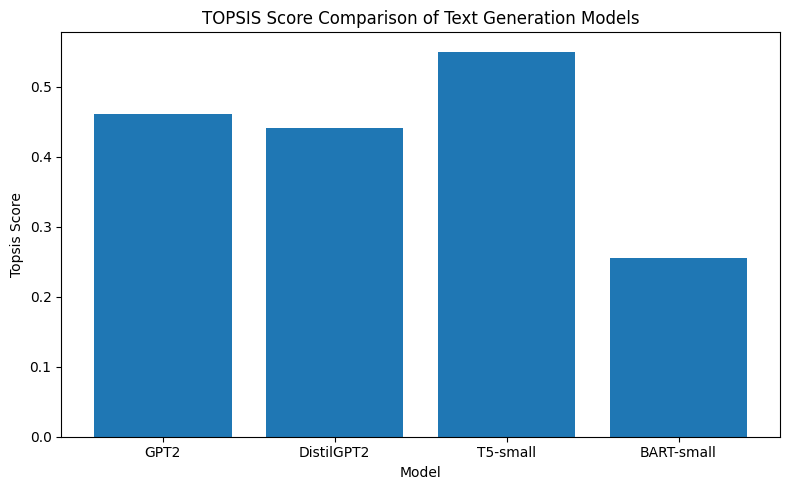

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("final_result.csv")

plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["Topsis Score"])
plt.title("TOPSIS Score Comparison of Text Generation Models")
plt.xlabel("Model")
plt.ylabel("Topsis Score")
plt.tight_layout()

# Save image
plt.savefig("topsis_score_comparison.png", dpi=200)
plt.show()


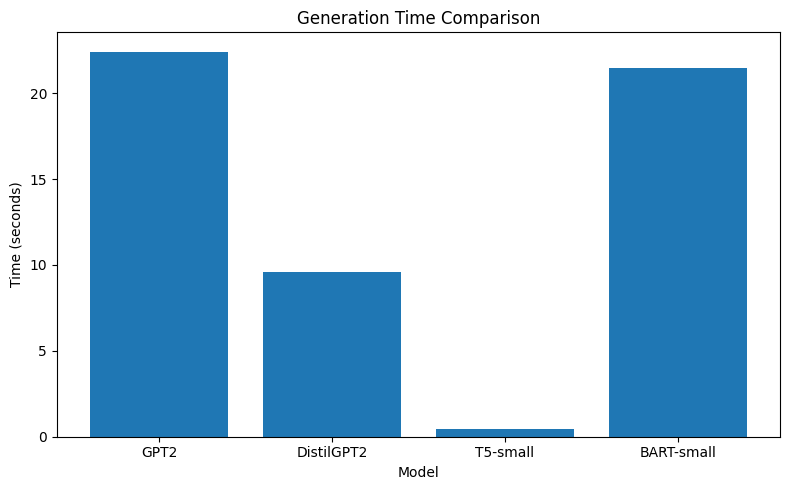

In [46]:
plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["Time"])
plt.title("Generation Time Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Model")
plt.tight_layout()
plt.savefig("time_comparison.png", dpi=200)
plt.show()


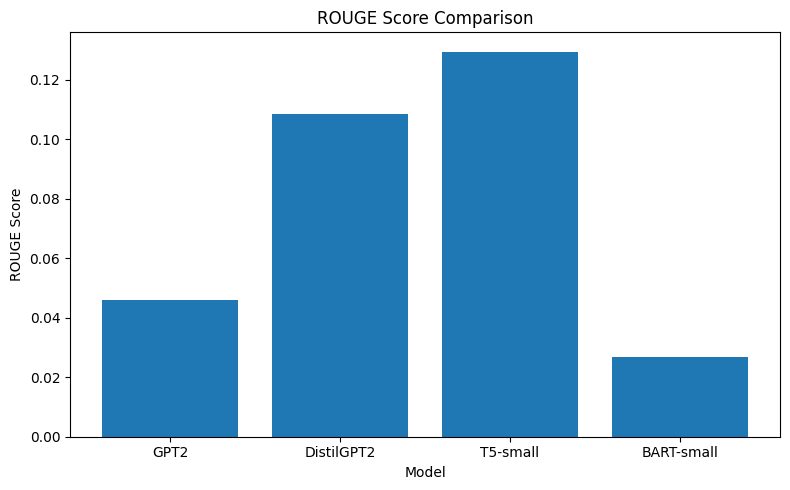

In [47]:
plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["ROUGE"])
plt.title("ROUGE Score Comparison")
plt.ylabel("ROUGE Score")
plt.xlabel("Model")
plt.tight_layout()
plt.savefig("rouge_comparison.png", dpi=200)
plt.show()


In [49]:
import pandas as pd

raw = pd.read_csv("raw_results.csv")
final = pd.read_csv("final_result.csv")

print("Raw Results (Before TOPSIS):")
display(raw)

print("Final Results (After TOPSIS):")
display(final)


Raw Results (Before TOPSIS):


,Model,BLEU,ROUGE,Time,Length
0,GPT2,0.004061,0.045910,22.420303,164.666667
1,DistilGPT2,0.000000,0.108519,9.589245,52.666667
2,T5-small,0.000000,0.129491,0.430651,6.333333
3,BART-small,0.000000,0.026894,21.454673,76.000000


Final Results (After TOPSIS):


,Model,BLEU,ROUGE,Time,Length,Topsis Score,Rank
0,GPT2,0.004061,0.045910,22.420303,164.666667,0.460974,2
1,DistilGPT2,0.000000,0.108519,9.589245,52.666667,0.441294,3
2,T5-small,0.000000,0.129491,0.430651,6.333333,0.550172,1
3,BART-small,0.000000,0.026894,21.454673,76.000000,0.254830,4
